
Training data length: 99219
Validate data length: 33073
Test data length: 33074


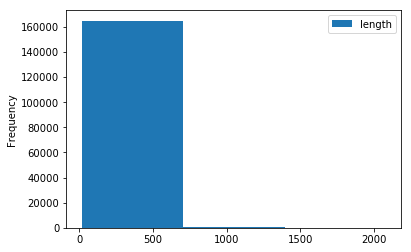

In [2]:
import pandas as pd
import re
import numpy as np
from numpy import array
import csv
import random


benign = pd.read_csv('FinalDataset/URL/Benign_list_big_final.csv',names=['url'])
benign['label']="0"
benign['length']= benign['url'].apply(len) 

defacement = pd.read_csv('FinalDataset/URL/DefacementSitesURLFiltered.csv',names=['url'])
defacement['label']="1"
defacement['length']= defacement['url'].apply(len) 

malware = pd.read_csv('FinalDataset/URL/Malware_dataset.csv',names=['url'])
malware['label']="2"
malware['length']= malware['url'].apply(len) 

phishing = pd.read_csv('FinalDataset/URL/phishing_dataset.csv',names=['url'])
phishing['label']="3"
phishing['length']= phishing['url'].apply(len) 


spam = pd.read_csv('FinalDataset/URL/spam_dataset.csv',names=['url'])
spam['label']="4"
spam['length']= spam['url'].apply(len) 


frames = [benign, defacement, malware, phishing, spam]

result = pd.concat(frames)

train, validate, test = np.split(result.sample(frac=1), [int(.6*len(result)), int(.8*len(result))])

print("\nTraining data length: "+str(train.shape[0]))
print("Validate data length: "+str(validate.shape[0]))
print("Test data length: "+str(test.shape[0]))


train.to_csv('../_train.csv',header=False,index=False,quoting=csv.QUOTE_ALL,columns=['label','url'])
validate.to_csv('../_validate.csv',header=False,index=False,quoting=csv.QUOTE_ALL,columns=['label','url'])
test.to_csv('../_test.csv',header=False,index=False,quoting=csv.QUOTE_ALL,columns=['label','url'])

result.plot.hist(bins=3)